In [1]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import mglearn
import numpy as np
from matplotlib import pyplot as plt

iris=load_iris()
logreg=LogisticRegression(max_iter=10000)

scores=cross_val_score(logreg,iris.data,iris.target)
print("Cross validation scores:{:.3f}".format(scores.mean()))

Cross validation scores:0.973


In [2]:
param_grid={'C':[0.001,0.01,0.1,1,10,100],'gamma':[0.001,0.01,0.1,1,10,100]}
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid_search=GridSearchCV(SVC(),param_grid,cv=5,return_train_score=True)

X_train,X_test,y_train,y_test=train_test_split(iris.data,iris.target,random_state=0)
grid_search.fit(X_train,y_train)
print("Test set score::{:.3f}".format(grid_search.score(X_test,y_test)))
print("Best parameters:{}".format(grid_search.best_params_))

Test set score::0.974
Best parameters:{'C': 10, 'gamma': 0.1}


In [3]:
param_grid={'C':[0.001,0.01,0.1,1,10,100],'gamma':[0.001,0.01,0.1,1,10,100]}
scores=cross_val_score(GridSearchCV(SVC(),param_grid),iris.data,iris.target,n_jobs=-1)
print("Cross validation score:{:.3f}".format(scores.mean()))

Cross validation score:0.980


In [4]:
from sklearn.datasets import load_digits
from sklearn.metrics import confusion_matrix

digits=load_digits()
y=digits.target==9
X_train,X_test,y_train,y_test=train_test_split(digits.data,y,random_state=0)
logreg=LogisticRegression(C=0.1,max_iter=100000).fit(X_train,y_train)
pred_logreg=logreg.predict(X_test)
confusion=confusion_matrix(y_test,pred_logreg)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[402   1]
 [  6  41]]


In [5]:
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
print("f1 score logistic regression:{:.2f}".format(f1_score(y_test,pred_logreg)))

f1 score logistic regression:0.92


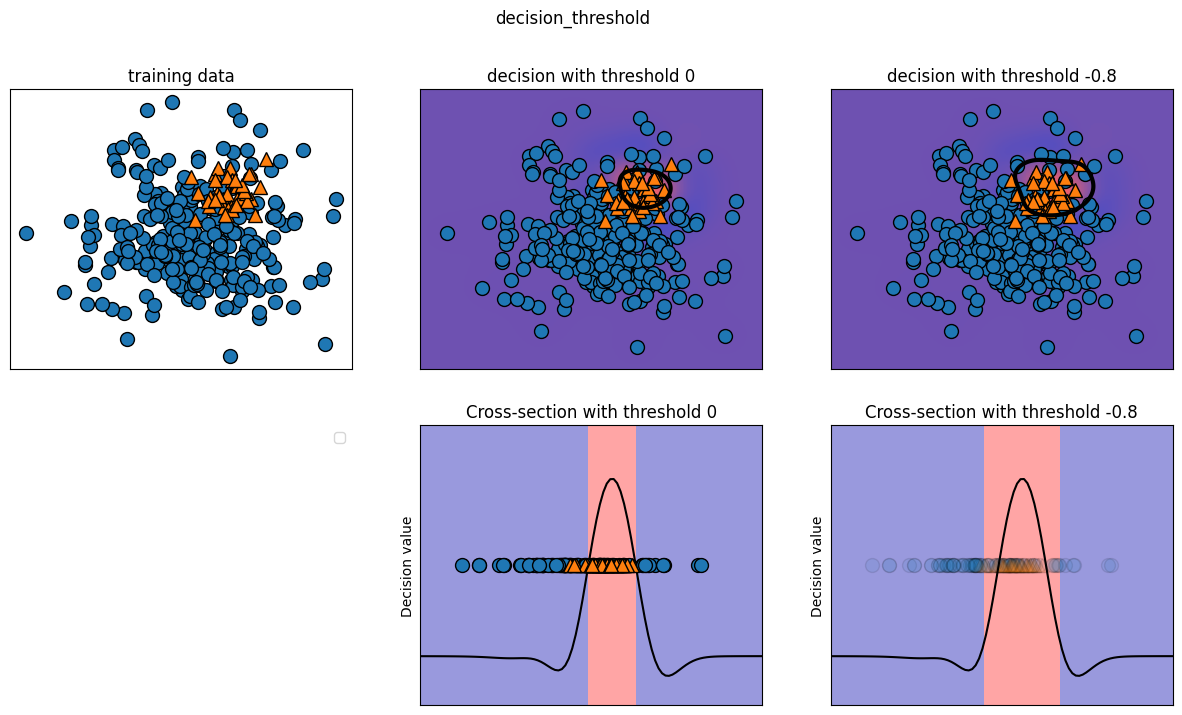

In [6]:
from sklearn.datasets import make_blobs
X,y=make_blobs(n_samples=(400,50),cluster_std=[7.0,2],random_state=22)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
svc=SVC(gamma=.05).fit(X_train,y_train)

mglearn.plots.plot_decision_threshold()

In [7]:
print(classification_report(y_test,svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       104
           1       0.35      0.67      0.46         9

    accuracy                           0.88       113
   macro avg       0.66      0.78      0.70       113
weighted avg       0.92      0.88      0.89       113



In [8]:
y_pred_lower_threshold=svc.decision_function(X_test)>-.8
print(classification_report(y_test,y_pred_lower_threshold))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90       104
           1       0.32      1.00      0.49         9

    accuracy                           0.83       113
   macro avg       0.66      0.91      0.69       113
weighted avg       0.95      0.83      0.87       113



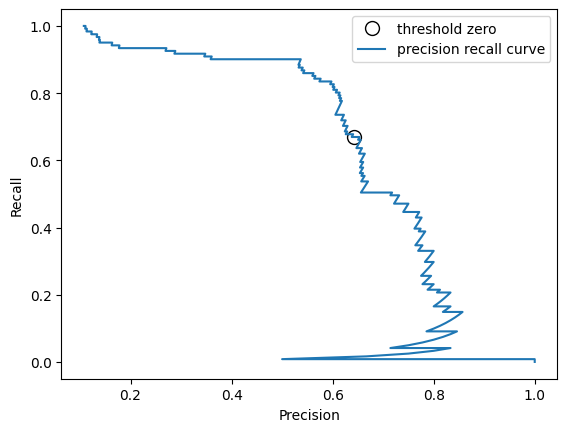

In [9]:
from sklearn.metrics import precision_recall_curve
from sklearn.ensemble import RandomForestClassifier 

X,y=make_blobs(n_samples=(4000,500),cluster_std=[7.0,2],random_state=22)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
svc=SVC(gamma=.05).fit(X_train,y_train)
precision,recall,thresholds=precision_recall_curve(y_test,svc.decision_function(X_test))
close_zero=np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero],recall[close_zero],'o',markersize=10,label="threshold zero",fillstyle="none",c="k")
plt.plot(precision,recall,label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

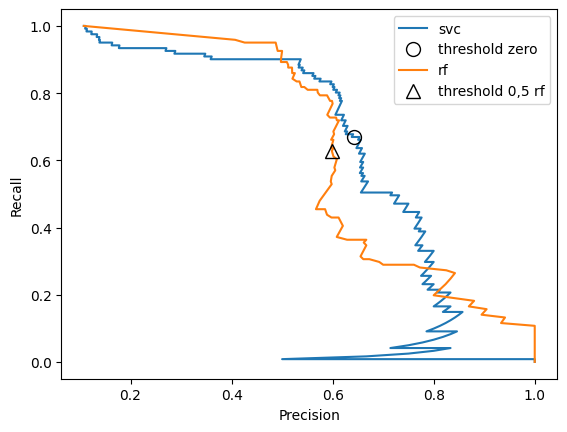

In [10]:
rf=RandomForestClassifier(n_estimators=100,random_state=0,max_features=2)
rf.fit(X_train,y_train)

precision_rf,recall_rf,thresholds_rf=precision_recall_curve(y_test,rf.predict_proba(X_test)[:,1])

plt.plot(precision,recall,label="svc")
plt.plot(precision[close_zero],recall[close_zero],'o',markersize=10,label="threshold zero",fillstyle="none",c="k")

plt.plot(precision_rf,recall_rf,label="rf")
close_zero_rf=np.argmin(np.abs(thresholds_rf-0.5))
plt.plot(precision_rf[close_zero_rf],recall_rf[close_zero_rf],'^',c="k",markersize=10,label="threshold 0,5 rf",fillstyle="none")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

In [11]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
rf_auc=roc_auc_score(y_test,rf.predict_proba(X_test)[:,1])
svc_auc=roc_auc_score(y_test,svc.decision_function(X_test))
print("AUC for random forest:{:.3f}".format(rf_auc))
print("AUC for SVC:{:.3f}".format(svc_auc))

AUC for random forest:0.937
AUC for SVC:0.916


gamma = 1.00 accuracy = 0.90 AUC = 0.50
gamma = 0.05 accuracy = 0.90 AUC = 1.00
gamma = 0.01 accuracy = 0.90 AUC = 1.00


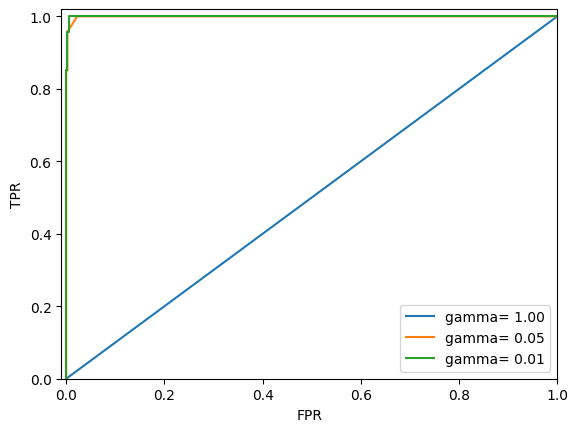

In [12]:
y=digits.target==9
X_train,X_test,y_train,y_test=train_test_split(digits.data,y,random_state=0)
plt.figure()
for gamma in [1,0.05,0.01]:
    svc=SVC(gamma=gamma).fit(X_train,y_train)
    accuracy=svc.score(X_test,y_test)
    auc=roc_auc_score(y_test,svc.decision_function(X_test))
    fpr,tpr,_=roc_curve(y_test,svc.decision_function(X_test))
    print("gamma = {:.2f} accuracy = {:.2f} AUC = {:.2f}".format(gamma,accuracy,auc))
    plt.plot(fpr,tpr,label="gamma= {:.2f}".format(gamma))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.xlim(-0.01,1)
plt.ylim(0,1.02)
plt.legend(loc="best")

In [22]:
from sklearn.metrics import accuracy_score
X_train,X_test,y_train,y_test=train_test_split(digits.data,digits.target,random_state=0)
lr=LogisticRegression(max_iter=10000).fit(X_train,y_train)
pred=lr.predict(X_test)
print("Accuracy score:{:.3f}".format(accuracy_score(y_test,pred)))
print("Confusion matrix:\n{}".format(confusion_matrix(y_test,pred)))

Accuracy score:0.953
Confusion matrix:
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  2  1]
 [ 0  0 41  3  0  0  0  0  0  0]
 [ 0  0  0 44  0  0  0  0  1  0]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  1  1  0  0 46  0  0]
 [ 0  3  1  0  0  0  1  0 43  0]
 [ 0  0  0  0  0  1  0  0  2 44]]
